In [53]:
import pandas as pd
# df = pd.read_csv("val_csv_london-1-1-55_across_epochs.csv")
# df = pd.read_csv("val_csv_london-1-1-55_across_epochs_with_zeros_wider_margin.csv")

df = pd.read_csv("csr_epochs_3_cities/val_csv_madrid-1-1-55-.csv")
df = df.fillna(df.mean())
df.head()


df = pd.read_csv("csr_epochs_3_cities/val_csv_london-1-1-55-.csv")
df = df.fillna(df.mean())
df.head()



,epoch,CSR_GB_count_y_exceeding_r_x,CSR_GB_no_thresh_frac_mean_2,CSR_GB_no_thresh_frac_mean_2_exp,CSR_GB_no_thresh_mean,CSR_GB_no_thresh_median,CSR_GB_sum_exp_y_exceeding_r_x_mean,CSR_GB_sum_y_exceeding_r_x_max,CSR_GB_sum_y_exceeding_r_x_mean,CSR_MP_count_y_exceeding_r_x,...,CSR_PM_no_thresh_median,CSR_PM_sum_exp_y_exceeding_r_x_mean,CSR_PM_sum_y_exceeding_r_x_max,CSR_PM_sum_y_exceeding_r_x_mean,loss,naive-model-mse,naive-model-non-zero,non_zero_mse,val_loss,val_non_zero_mse
0,0,46.337,2.477531,0.159336,1677.515655,1480.824801,0.000094,1684.536759,1681.623265,0.000000,...,844.375,0.003128,1546.454478,1102.009539,5050.753906,740.477593,2173.296825,16960.439453,6200.732910,22571.437500
1,1,46.337,2.477531,0.159336,1677.515655,1480.824801,0.000094,1684.536759,1681.623265,1.222667,...,844.375,0.003128,1546.454478,1102.009539,821.343140,740.513470,2173.915875,2641.046631,1973.784424,6999.264160
2,2,46.337,2.477531,0.159336,1677.515655,1480.824801,0.000094,1684.536759,1681.623265,7.379333,...,844.375,0.003128,1546.454478,1102.009539,768.438599,740.675694,2173.462104,2456.905273,814.037720,2634.719971
3,3,46.337,2.477531,0.159336,1677.515655,1480.824801,0.000094,1684.536759,1681.623265,15.164000,...,844.375,0.003128,1546.454478,1102.009539,759.687744,740.471682,2174.127585,2431.976318,726.397949,2201.463867
4,4,46.337,2.477531,0.159336,1677.515655,1480.824801,0.000094,1684.536759,1681.623265,11.797667,...,844.375,0.003128,1546.454478,1102.009539,744.301392,740.474603,2172.417900,2374.453125,618.755676,1858.873291


In [54]:
df.columns

Index(['epoch', 'CSR_GB_count_y_exceeding_r_x', 'CSR_GB_no_thresh_frac_mean_2',
       'CSR_GB_no_thresh_frac_mean_2_exp', 'CSR_GB_no_thresh_mean',
       'CSR_GB_no_thresh_median', 'CSR_GB_sum_exp_y_exceeding_r_x_mean',
       'CSR_GB_sum_y_exceeding_r_x_max', 'CSR_GB_sum_y_exceeding_r_x_mean',
       'CSR_MP_count_y_exceeding_r_x', 'CSR_MP_no_thresh_frac_mean_2',
       'CSR_MP_no_thresh_frac_mean_2_exp', 'CSR_MP_no_thresh_mean',
       'CSR_MP_no_thresh_median', 'CSR_MP_sum_exp_y_exceeding_r_x_mean',
       'CSR_MP_sum_y_exceeding_r_x_max', 'CSR_MP_sum_y_exceeding_r_x_mean',
       'CSR_NM_count_y_exceeding_r_x', 'CSR_NM_no_thresh_frac_mean_2',
       'CSR_NM_no_thresh_frac_mean_2_exp', 'CSR_NM_no_thresh_mean',
       'CSR_NM_no_thresh_median', 'CSR_NM_sum_exp_y_exceeding_r_x_mean',
       'CSR_NM_sum_y_exceeding_r_x_max', 'CSR_NM_sum_y_exceeding_r_x_mean',
       'CSR_PM_count_y_exceeding_r_x', 'CSR_PM_no_thresh_frac_mean_2',
       'CSR_PM_no_thresh_frac_mean_2_exp', 'CSR_PM_no_th

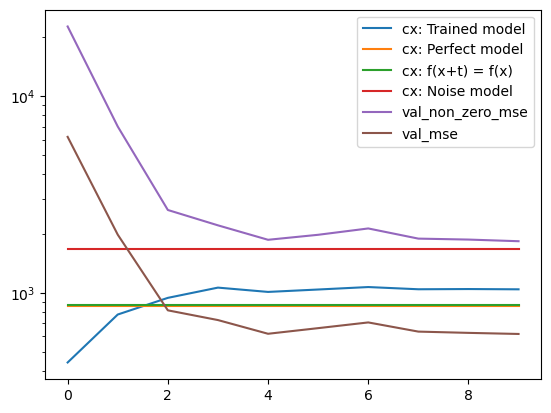

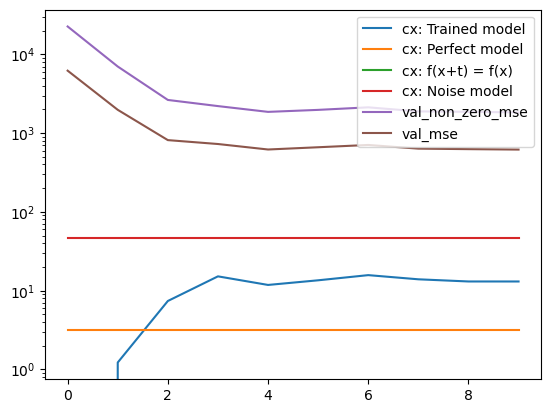

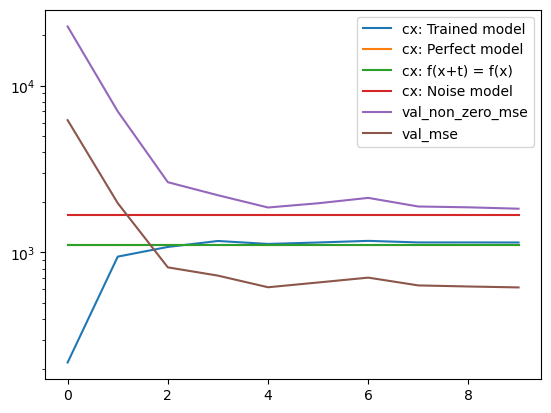

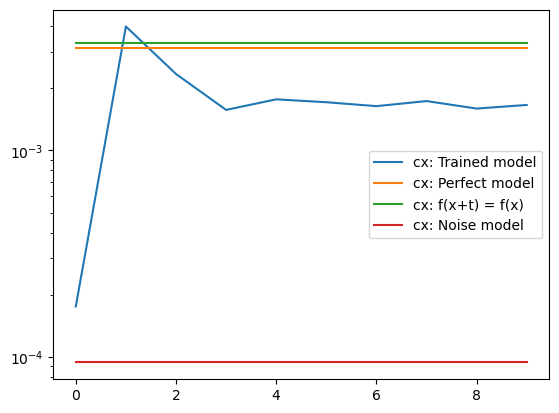

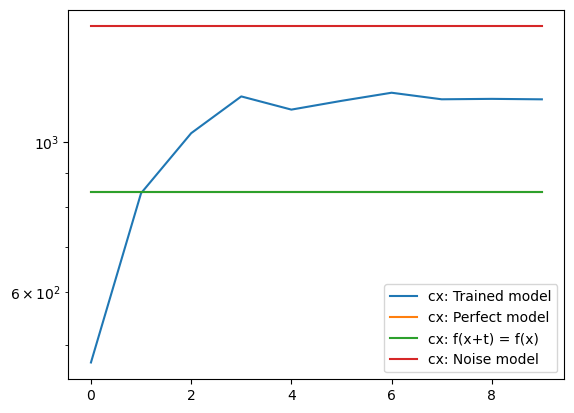

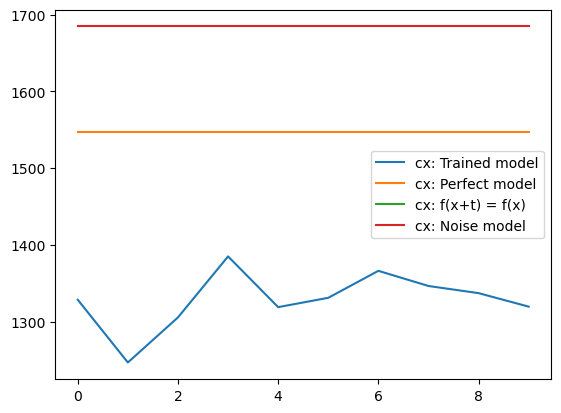

In [55]:
x = df["epoch"].tolist()
val_mse = df["val_loss"].tolist()
val_non_zero_mse = df["val_non_zero_mse"].tolist()
nm_non_zero = df["naive-model-non-zero"].tolist()
nm_mse = df["naive-model-mse"].tolist()

import matplotlib.pyplot as plt

cx_MP = df["CSR_MP_no_thresh_mean"].tolist()
cx_PM = df["CSR_PM_no_thresh_mean"].tolist()
cx_NM = df["CSR_NM_no_thresh_mean"].tolist()
cx_GB = df["CSR_GB_no_thresh_mean"].tolist()


import matplotlib.pyplot as plt
plt.plot(x, cx_MP, label = "cx: Trained model")
plt.plot(x, cx_PM, label = "cx: Perfect model")
plt.plot(x, cx_NM, label = "cx: f(x+t) = f(x)")
plt.plot(x, cx_GB, label = "cx: Noise model")
plt.plot(x, val_non_zero_mse, label = "val_non_zero_mse")
# plt.plot(x, nm_non_zero, label = "naive_model_non_zero_mse")
plt.plot(x, val_mse, label = "val_mse")
plt.legend()
# plt.ylim(0, 2000)
plt.yscale('log')
plt.show()


cx_MP = df["CSR_MP_count_y_exceeding_r_x"].tolist()
cx_PM = df["CSR_PM_count_y_exceeding_r_x"].tolist()
cx_NM = df["CSR_NM_count_y_exceeding_r_x"].tolist()
cx_GB = df["CSR_GB_count_y_exceeding_r_x"].tolist()


import matplotlib.pyplot as plt
plt.plot(x, cx_MP, label = "cx: Trained model")
plt.plot(x, cx_PM, label = "cx: Perfect model")
plt.plot(x, cx_NM, label = "cx: f(x+t) = f(x)")
plt.plot(x, cx_GB, label = "cx: Noise model")
plt.plot(x, val_non_zero_mse, label = "val_non_zero_mse")
# plt.plot(x, nm_non_zero, label = "naive_model_non_zero_mse")
plt.plot(x, val_mse, label = "val_mse")
plt.legend()
# plt.ylim(0, 2000)
plt.yscale('log')
plt.show()



cx_MP = df["CSR_MP_sum_y_exceeding_r_x_mean"].tolist()
cx_PM = df["CSR_PM_sum_y_exceeding_r_x_mean"].tolist()
cx_NM = df["CSR_NM_sum_y_exceeding_r_x_mean"].tolist()
cx_GB = df["CSR_GB_sum_y_exceeding_r_x_mean"].tolist()


import matplotlib.pyplot as plt
plt.plot(x, cx_MP, label = "cx: Trained model")
plt.plot(x, cx_PM, label = "cx: Perfect model")
plt.plot(x, cx_NM, label = "cx: f(x+t) = f(x)")
plt.plot(x, cx_GB, label = "cx: Noise model")
plt.plot(x, val_non_zero_mse, label = "val_non_zero_mse")
# plt.plot(x, nm_non_zero, label = "naive_model_non_zero_mse")
plt.plot(x, val_mse, label = "val_mse")
plt.legend()
# plt.ylim(0, 2000)
plt.yscale('log')
plt.show()


cx_MP = df["CSR_MP_sum_exp_y_exceeding_r_x_mean"].tolist()
cx_PM = df["CSR_PM_sum_exp_y_exceeding_r_x_mean"].tolist()
cx_NM = df["CSR_NM_sum_exp_y_exceeding_r_x_mean"].tolist()
cx_GB = df["CSR_GB_sum_exp_y_exceeding_r_x_mean"].tolist()


import matplotlib.pyplot as plt
plt.plot(x, cx_MP, label = "cx: Trained model")
plt.plot(x, cx_PM, label = "cx: Perfect model")
plt.plot(x, cx_NM, label = "cx: f(x+t) = f(x)")
plt.plot(x, cx_GB, label = "cx: Noise model")
# plt.plot(x, val_non_zero_mse, label = "val_non_zero_mse")
# plt.plot(x, nm_non_zero, label = "naive_model_non_zero_mse")
# plt.plot(x, val_mse, label = "val_mse")
plt.legend()
# plt.ylim(0, 2000)
plt.yscale('log')
plt.show()



cx_MP = df["CSR_MP_no_thresh_median"].tolist()
cx_PM = df["CSR_PM_no_thresh_median"].tolist()
cx_NM = df["CSR_NM_no_thresh_median"].tolist()
cx_GB = df["CSR_GB_no_thresh_median"].tolist()

import matplotlib.pyplot as plt
plt.plot(x, cx_MP, label = "cx: Trained model")
plt.plot(x, cx_PM, label = "cx: Perfect model")
plt.plot(x, cx_NM, label = "cx: f(x+t) = f(x)")
plt.plot(x, cx_GB, label = "cx: Noise model")
# plt.plot(x, val_non_zero_mse, label = "val_non_zero_mse")
# plt.plot(x, nm_non_zero, label = "naive_model_non_zero_mse")
# plt.plot(x, val_mse, label = "val_mse")
plt.legend()
# plt.ylim(0, 2000)
plt.yscale('log')
plt.show()

# cx_MP = df["CSR_MP_no_thresh_frac_mean_2"].tolist()
# cx_PM = df["CSR_PM_no_thresh_frac_mean_2"].tolist()
# cx_NM = df["CSR_NM_no_thresh_frac_mean_2"].tolist()
# cx_GB = df["CSR_GB_no_thresh_frac_mean_2"].tolist()


# import matplotlib.pyplot as plt
# plt.plot(x, cx_MP, label = "cx: Trained model")
# plt.plot(x, cx_PM, label = "cx: Perfect model")
# plt.plot(x, cx_NM, label = "cx: f(x+t) = f(x)")
# plt.plot(x, cx_GB, label = "cx: Noise model")
# # plt.plot(x, val_non_zero_mse, label = "val_non_zero_mse")
# # plt.plot(x, nm_non_zero, label = "naive_model_non_zero_mse")
# # plt.plot(x, val_mse, label = "val_mse")
# plt.legend()
# # plt.ylim(0, 2000)
# plt.yscale('log')
# plt.show()


# cx_MP = df["CSR_MP_no_thresh_frac_mean_2_exp"].tolist()
# cx_PM = df["CSR_PM_no_thresh_frac_mean_2_exp"].tolist()
# cx_NM = df["CSR_NM_no_thresh_frac_mean_2_exp"].tolist()
# cx_GB = df["CSR_GB_no_thresh_frac_mean_2_exp"].tolist()


# import matplotlib.pyplot as plt
# plt.plot(x, cx_MP, label = "cx: Trained model")
# plt.plot(x, cx_PM, label = "cx: Perfect model")
# plt.plot(x, cx_NM, label = "cx: f(x+t) = f(x)")
# plt.plot(x, cx_GB, label = "cx: Noise model")
# # plt.plot(x, val_non_zero_mse, label = "val_non_zero_mse")
# # plt.plot(x, nm_non_zero, label = "naive_model_non_zero_mse")
# # plt.plot(x, val_mse, label = "val_mse")
# plt.legend()
# # plt.ylim(0, 2000)
# plt.yscale('log')
# plt.show()



cx_MP = df["CSR_MP_sum_y_exceeding_r_x_max"].tolist()
cx_PM = df["CSR_PM_sum_y_exceeding_r_x_max"].tolist()
cx_NM = df["CSR_NM_sum_y_exceeding_r_x_max"].tolist()
cx_GB = df["CSR_GB_sum_y_exceeding_r_x_max"].tolist()


import matplotlib.pyplot as plt
plt.plot(x, cx_MP, label = "cx: Trained model")
plt.plot(x, cx_PM, label = "cx: Perfect model")
plt.plot(x, cx_NM, label = "cx: f(x+t) = f(x)")
plt.plot(x, cx_GB, label = "cx: Noise model")
# plt.plot(x, val_non_zero_mse, label = "val_non_zero_mse")
# plt.plot(x, nm_non_zero, label = "naive_model_non_zero_mse")
# plt.plot(x, val_mse, label = "val_mse")
plt.legend()
# plt.ylim(0, 2000)
# plt.yscale('log')
plt.show()


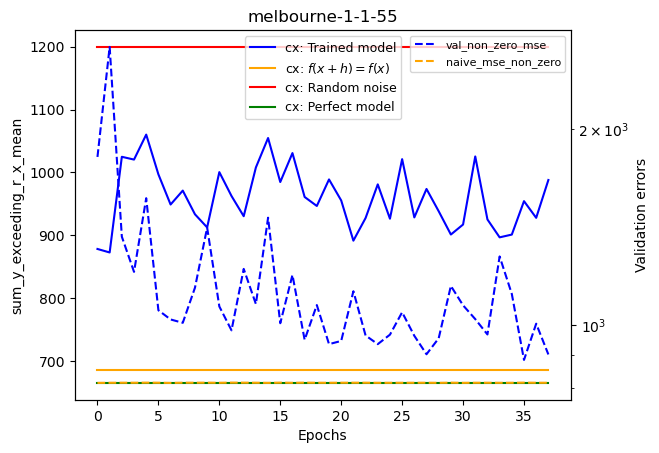

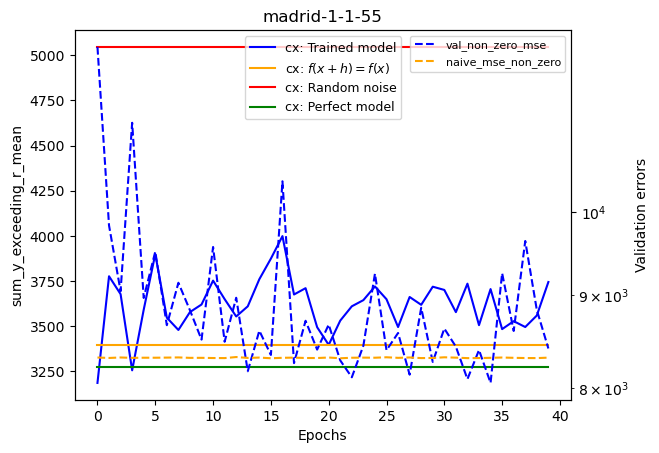

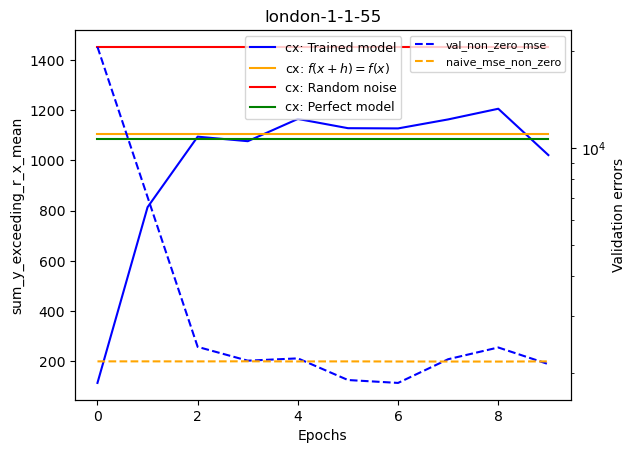

In [62]:
######################################################################################
df = pd.read_csv("csr_epochs_3_cities/val_csv_melbourne-1-1-55-.csv")
df = df.fillna(df.mean())
df.head()

x = df["epoch"].tolist()
val_mse = df["val_loss"].tolist()
val_non_zero_mse = df["val_non_zero_mse"].tolist()
nm_non_zero = df["naive-model-non-zero"].tolist()

cx_MP = df["CSR_MP_sum_y_exceeding_r_x_mean"].tolist()
cx_PM = df["CSR_PM_sum_y_exceeding_r_x_mean"].tolist()
cx_NM = df["CSR_NM_sum_y_exceeding_r_x_mean"].tolist()
cx_GB = df["CSR_GB_sum_y_exceeding_r_x_mean"].tolist()

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


ax1.set_xlabel('Epochs')
ax1.set_ylabel('sum_y_exceeding_r_x_mean')
ax2.set_ylabel('Validation errors')


ax1.plot(x, cx_MP, label="cx: Trained model", color='blue')
ax1.plot(x, cx_NM, label=r"cx: $f(x+h) = f(x)$", color="orange")
ax1.plot(x, cx_GB, label="cx: Random noise", color="red")
ax1.plot(x, cx_PM, label="cx: Perfect model", color="green")


ax2.plot(x, val_non_zero_mse, '--', label = "val_non_zero_mse", color='blue')
# ax2.plot(x, val_mse, '--', label = "val_mse", color='blue')
ax2.plot(x, nm_non_zero, '--', label = "naive_mse_non_zero", color="orange")

# plt.legend()
# plt.ylim(0, 2000)
# plt.yscale('log')
# ax1.set_yscale("log")
ax2.set_yscale("log")

ax2.legend(loc=1, fontsize=8) # loc=1)
ax1.legend(loc=9, fontsize=9)
plt.title("melbourne-1-1-55")
plt.show()



######################################################################################
df = pd.read_csv("csr_epochs_3_cities/val_csv_madrid-1-1-55-.csv")
df = df.fillna(df.mean())
df.head()

x = df["epoch"].tolist()
val_mse = df["val_loss"].tolist()
val_non_zero_mse = df["val_non_zero_mse"].tolist()
nm_non_zero = df["naive-model-non-zero"].tolist()

cx_MP = df["CSR_MP_sum_y_exceeding_r_x_mean"].tolist()
cx_PM = df["CSR_PM_sum_y_exceeding_r_x_mean"].tolist()
cx_NM = df["CSR_NM_sum_y_exceeding_r_x_mean"].tolist()
cx_GB = df["CSR_GB_sum_y_exceeding_r_x_mean"].tolist()

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


ax1.set_xlabel('Epochs')
ax1.set_ylabel('sum_y_exceeding_r_mean')
ax2.set_ylabel('Validation errors')


ax1.plot(x, cx_MP, label="cx: Trained model", color='blue')
ax1.plot(x, cx_NM, label=r"cx: $f(x+h) = f(x)$", color="orange")
ax1.plot(x, cx_GB, label="cx: Random noise", color="red")
ax1.plot(x, cx_PM, label="cx: Perfect model", color="green")


ax2.plot(x, val_non_zero_mse, '--', label = "val_non_zero_mse", color='blue')
# ax2.plot(x, val_mse, '--', label = "val_mse", color='blue')
ax2.plot(x, nm_non_zero, '--', label = "naive_mse_non_zero", color="orange")

# plt.legend()
# plt.ylim(0, 2000)
# plt.yscale('log')
# ax1.set_yscale("log")
ax2.set_yscale("log")

ax2.legend(loc=1, fontsize=8) # loc=1)
ax1.legend(loc=9, fontsize=9)
plt.title("madrid-1-1-55")
plt.show()

######################################################################################

df = pd.read_csv("csr_epochs_3_cities/val_csv_london-1-1-55-.csv")
df = df.fillna(df.mean())
df.head()

x = df["epoch"].tolist()
val_mse = df["val_loss"].tolist()
val_non_zero_mse = df["val_non_zero_mse"].tolist()
nm_non_zero = df["naive-model-non-zero"].tolist()

cx_MP = df["CSR_MP_sum_y_exceeding_r_x_mean"].tolist()
cx_PM = df["CSR_PM_sum_y_exceeding_r_x_mean"].tolist()
cx_NM = df["CSR_NM_sum_y_exceeding_r_x_mean"].tolist()
cx_GB = df["CSR_GB_sum_y_exceeding_r_x_mean"].tolist()

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


ax1.set_xlabel('Epochs')
ax1.set_ylabel('sum_y_exceeding_r_x_mean')
ax2.set_ylabel('Validation errors')


ax1.plot(x, cx_MP, label="cx: Trained model", color='blue')
ax1.plot(x, cx_NM, label=r"cx: $f(x+h) = f(x)$", color="orange")
ax1.plot(x, cx_GB, label="cx: Random noise", color="red")
ax1.plot(x, cx_PM, label="cx: Perfect model", color="green")


ax2.plot(x, val_non_zero_mse, '--', label = "val_non_zero_mse", color='blue')
# ax2.plot(x, val_mse, '--', label = "val_mse", color='blue')
ax2.plot(x, nm_non_zero, '--', label = "naive_mse_non_zero", color="orange")

# plt.legend()
# plt.ylim(0, 2000)
# plt.yscale('log')
# ax1.set_yscale("log")
ax2.set_yscale("log")

ax2.legend(loc=1, fontsize=8) # loc=1)
ax1.legend(loc=9, fontsize=9)
plt.title("london-1-1-55")
plt.show()

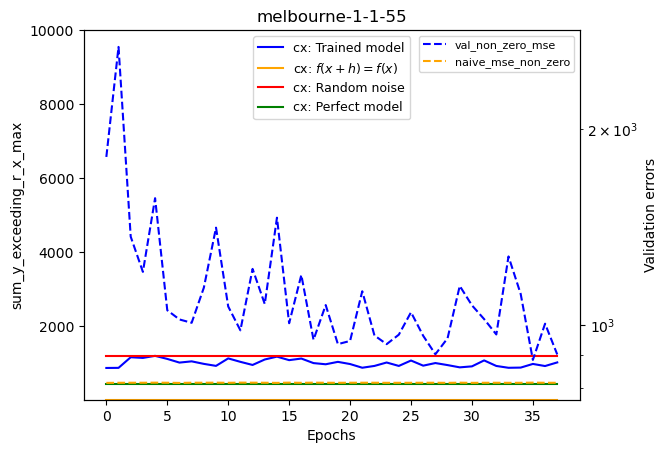

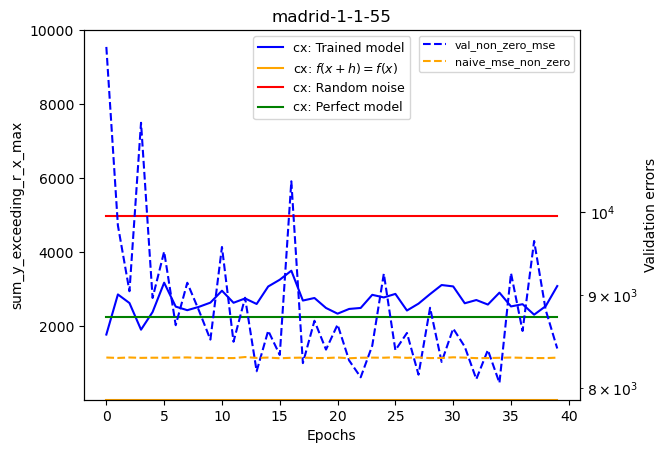

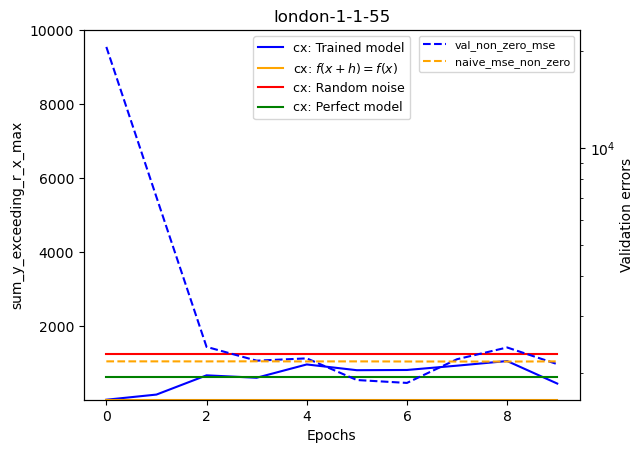

In [70]:
######################################################################################
df = pd.read_csv("csr_epochs_3_cities/val_csv_melbourne-1-1-55-.csv")
df = df.fillna(df.mean())
df.head()

x = df["epoch"].tolist()
val_mse = df["val_loss"].tolist()
val_non_zero_mse = df["val_non_zero_mse"].tolist()
nm_non_zero = df["naive-model-non-zero"].tolist()

cx_MP = df["CSR_MP_sum_y_exceeding_r_x_max"].tolist()
cx_PM = df["CSR_PM_sum_y_exceeding_r_x_max"].tolist()
cx_NM = df["CSR_NM_sum_y_exceeding_r_x_max"].tolist()
cx_GB = df["CSR_GB_sum_y_exceeding_r_x_max"].tolist()

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


ax1.set_xlabel('Epochs')
ax1.set_ylabel('sum_y_exceeding_r_x_max')
ax2.set_ylabel('Validation errors')


ax1.plot(x, cx_MP, label="cx: Trained model", color='blue')
ax1.plot(x, cx_NM, label=r"cx: $f(x+h) = f(x)$", color="orange")
ax1.plot(x, cx_GB, label="cx: Random noise", color="red")
ax1.plot(x, cx_PM, label="cx: Perfect model", color="green")


ax2.plot(x, val_non_zero_mse, '--', label = "val_non_zero_mse", color='blue')
# ax2.plot(x, val_mse, '--', label = "val_mse", color='blue')
ax2.plot(x, nm_non_zero, '--', label = "naive_mse_non_zero", color="orange")

# plt.legend()
# plt.ylim(0, 2000)
# plt.yscale('log')
# ax1.set_yscale("log")
ax2.set_yscale("log")

ax2.legend(loc=1, fontsize=8) # loc=1)
ax1.legend(loc=9, fontsize=9)
plt.title("melbourne-1-1-55")
ax1.set_ylim(0.5, 10000)
# ax2.set_ylim(1000, 10000)
plt.show()



######################################################################################
df = pd.read_csv("csr_epochs_3_cities/val_csv_madrid-1-1-55-.csv")
df = df.fillna(df.mean())
df.head()

x = df["epoch"].tolist()
val_mse = df["val_loss"].tolist()
val_non_zero_mse = df["val_non_zero_mse"].tolist()
nm_non_zero = df["naive-model-non-zero"].tolist()

cx_MP = df["CSR_MP_sum_y_exceeding_r_x_max"].tolist()
cx_PM = df["CSR_PM_sum_y_exceeding_r_x_max"].tolist()
cx_NM = df["CSR_NM_sum_y_exceeding_r_x_max"].tolist()
cx_GB = df["CSR_GB_sum_y_exceeding_r_x_max"].tolist()

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


ax1.set_xlabel('Epochs')
ax1.set_ylabel('sum_y_exceeding_r_x_max')
ax2.set_ylabel('Validation errors')


ax1.plot(x, cx_MP, label="cx: Trained model", color='blue')
ax1.plot(x, cx_NM, label=r"cx: $f(x+h) = f(x)$", color="orange")
ax1.plot(x, cx_GB, label="cx: Random noise", color="red")
ax1.plot(x, cx_PM, label="cx: Perfect model", color="green")


ax2.plot(x, val_non_zero_mse, '--', label = "val_non_zero_mse", color='blue')
# ax2.plot(x, val_mse, '--', label = "val_mse", color='blue')
ax2.plot(x, nm_non_zero, '--', label = "naive_mse_non_zero", color="orange")

# plt.legend()
# plt.ylim(0, 2000)
# plt.yscale('log')
# ax1.set_yscale("log")
ax2.set_yscale("log")

ax2.legend(loc=1, fontsize=8) # loc=1)
ax1.legend(loc=9, fontsize=9)
plt.title("madrid-1-1-55")
ax1.set_ylim(0.5, 10000)
# ax2.set_ylim(1000, 10000)
plt.show()

######################################################################################

df = pd.read_csv("csr_epochs_3_cities/val_csv_london-1-1-55-.csv")
df = df.fillna(df.mean())
df.head()

x = df["epoch"].tolist()
val_mse = df["val_loss"].tolist()
val_non_zero_mse = df["val_non_zero_mse"].tolist()
nm_non_zero = df["naive-model-non-zero"].tolist()

cx_MP = df["CSR_MP_sum_y_exceeding_r_x_max"].tolist()
cx_PM = df["CSR_PM_sum_y_exceeding_r_x_max"].tolist()
cx_NM = df["CSR_NM_sum_y_exceeding_r_x_max"].tolist()
cx_GB = df["CSR_GB_sum_y_exceeding_r_x_max"].tolist()

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


ax1.set_xlabel('Epochs')
ax1.set_ylabel('sum_y_exceeding_r_x_max')
ax2.set_ylabel('Validation errors')


ax1.plot(x, cx_MP, label="cx: Trained model", color='blue')
ax1.plot(x, cx_NM, label=r"cx: $f(x+h) = f(x)$", color="orange")
ax1.plot(x, cx_GB, label="cx: Random noise", color="red")
ax1.plot(x, cx_PM, label="cx: Perfect model", color="green")


ax2.plot(x, val_non_zero_mse, '--', label = "val_non_zero_mse", color='blue')
# ax2.plot(x, val_mse, '--', label = "val_mse", color='blue')
ax2.plot(x, nm_non_zero, '--', label = "naive_mse_non_zero", color="orange")

# plt.legend()
# plt.ylim(0, 2000)
# plt.yscale('log')
# ax1.set_yscale("log")
ax2.set_yscale("log")

ax2.legend(loc=1, fontsize=8) # loc=1)
ax1.legend(loc=9, fontsize=9)
plt.title("london-1-1-55")
ax1.set_ylim(0.5, 10000)
# ax2.set_ylim(1000, 10000)
plt.show()